In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


# IMDB

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


/Users/leonjdaeim/opt/miniconda3/envs/deeplearn/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/leonjdaeim/opt/miniconda3/envs/deeplearn/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [7]:
print(train_data[0][0:20])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


In [9]:
print(train_labels[0])

1


In [10]:
max([max(sequence) for sequence in train_data]) #Limited to no more than 10k words

9999

__Decoding__

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 0us/step


In [17]:
decoded_review[

'?'

In [25]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

__prepping__

In [26]:
import numpy as np

##############################
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
#####
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

__encoding the integer sequences into a binary matrix__

In [39]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

__model definition__

In [33]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

__compile model__

In [34]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

Two alternative to compile the model:


```python
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])
```


```python
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])
```        

__prepare validation set__

In [40]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

__train model__

In [42]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

In [41]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.5815 - acc: 0.7834 - val_loss: 0.4783 - val_acc: 0.8447
Epoch 2/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.3926 - acc: 0.8893 - val_loss: 0.3674 - val_acc: 0.8725
Epoch 3/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.2835 - acc: 0.9139 - val_loss: 0.3029 - val_acc: 0.8874
Epoch 4/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.2190 - acc: 0.9303 - val_loss: 0.2905 - val_acc: 0.8852
Epoch 5/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.1754 - acc: 0.9437 - val_loss: 0.3078 - val_acc: 0.8747
Epoch 6/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.1484 - acc: 0.9519 - val_loss: 0.2912 - val_acc: 0.8831
Epoch 7/20
15000/15000 [==============================] - 1s 41us/step - loss: 0.1238 - acc: 0.9618 - val_loss: 0.2867 - val_ac

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

__plotting the training and validation loss__

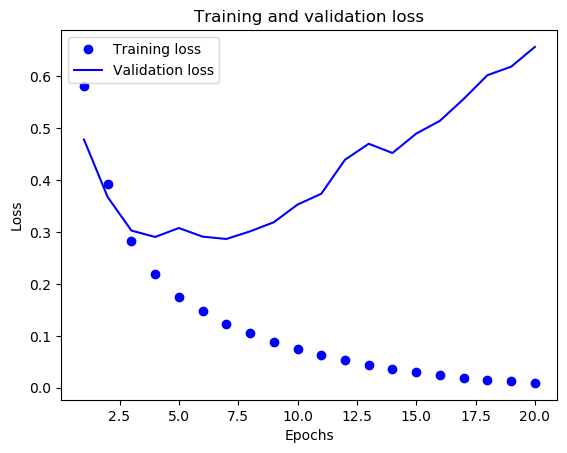

In [45]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

__plotting the training and validation accuracy__

In [49]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

__retraining a model from scratch__

With only 4 epochs

In [53]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4871 - accuracy: 0.8176
Epoch 2/4
25000/25000 [==============================] - 1s 33us/step - loss: 0.2801 - accuracy: 0.9051
Epoch 3/4
25000/25000 [==============================] - ETA: 0s - loss: 0.2135 - accuracy: 0.92 - 1s 33us/step - loss: 0.2132 - accuracy: 0.9253
Epoch 4/4
25000/25000 [==============================] - 2s 87us/step


In [54]:
results

[0.28403809337615965, 0.8867599964141846]

__using a trained network to generate predictions on new data__

In [55]:
model.predict(x_test)

array([[0.20743391],
       [0.99987626],
       [0.8853257 ],
       ...,
       [0.13498804],
       [0.08877769],
       [0.64741874]], dtype=float32)

# The Reuters dataset

In [56]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


/Users/leonjdaeim/opt/miniconda3/envs/deeplearn/lib/python3.7/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/leonjdaeim/opt/miniconda3/envs/deeplearn/lib/python3.7/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [57]:
len(train_data), len(test_data)

(8982, 2246)

In [61]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [62]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [64]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [69]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [65]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [66]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

__train the model__

In [71]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 145us/step - loss: 2.6889 - accuracy: 0.4539 - val_loss: 1.8008 - val_accuracy: 0.6330
Epoch 2/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.4567 - accuracy: 0.7063 - val_loss: 1.3128 - val_accuracy: 0.7270
Epoch 3/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.0597 - accuracy: 0.7741 - val_loss: 1.1312 - val_accuracy: 0.7600
Epoch 4/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.8330 - accuracy: 0.8200 - val_loss: 1.0685 - val_accuracy: 0.7720
Epoch 5/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.6657 - accuracy: 0.8530 - val_loss: 0.9879 - val_accuracy: 0.7960
Epoch 6/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.5371 - accuracy: 0.8842 - val_loss: 0.9268 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.43

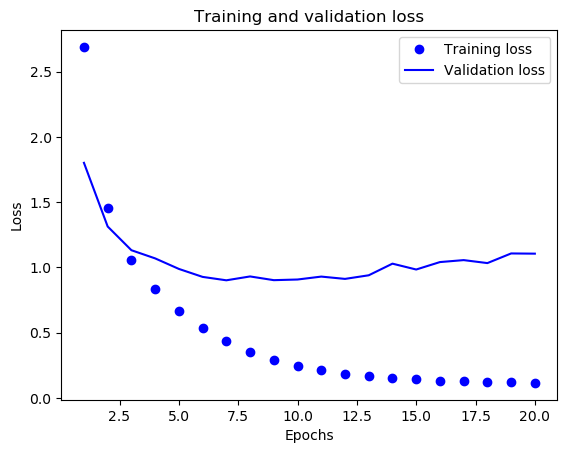

In [72]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

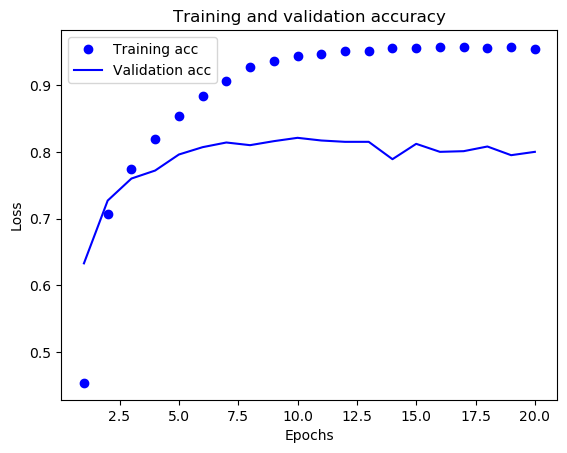

In [79]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

__retrain__

Since the network begins to overfit after 9 epochs, try a new network from scratch and do only 9

In [81]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 120us/step - loss: 2.5561 - accuracy: 0.5474 - val_loss: 1.6719 - val_accuracy: 0.6520
Epoch 2/9
7982/7982 [==============================] - 0s 57us/step - loss: 1.3910 - accuracy: 0.7067 - val_loss: 1.2970 - val_accuracy: 0.7150
Epoch 3/9
7982/7982 [==============================] - 0s 56us/step - loss: 1.0508 - accuracy: 0.7744 - val_loss: 1.1543 - val_accuracy: 0.7430
Epoch 4/9
7982/7982 [==============================] - 0s 57us/step - loss: 0.8338 - accuracy: 0.8276 - val_loss: 1.0634 - val_accuracy: 0.7690
Epoch 5/9
7982/7982 [==============================] - 0s 58us/step - loss: 0.6678 - accuracy: 0.8623 - val_loss: 1.0122 - val_accuracy: 0.7940
Epoch 6/9
7982/7982 [==============================] - 0s 58us/step - loss: 0.5335 - accuracy: 0.8913 - val_loss: 0.9600 - val_accuracy: 0.8050
Epoch 7/9
7982/7982 [==============================] - 0s 60us/step - loss: 0.4314 - ac

In [82]:
results #Accuracy is ~80%

[1.0007840368435623, 0.7876224517822266]

In [83]:
### Accuracy's random chance would be 50% in a naive classifier
# Here is ~20%
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18210151380231523

__use the model to predict on unseen data__

In [84]:
predictions = model.predict(x_test)

In [85]:
predictions[0].shape

(46,)

In [86]:
np.sum(predictions[0])

1.0

__alternatives to handle labels and loss__

In [88]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [91]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

because the final outputs are 46-dimensional, you should avoid intermediate layers with many fewer than 46 hidden units

In [92]:
### Introduce a bottleneck: layer of 4
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 190us/step - loss: 2.9958 - accuracy: 0.1878 - val_loss: 2.3294 - val_accuracy: 0.5760
Epoch 2/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.8573 - accuracy: 0.5770 - val_loss: 1.6707 - val_accuracy: 0.5800
Epoch 3/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.4567 - accuracy: 0.5905 - val_loss: 1.5437 - val_accuracy: 0.5810
Epoch 4/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.3014 - accuracy: 0.6062 - val_loss: 1.5067 - val_accuracy: 0.6050
Epoch 5/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.1859 - accuracy: 0.6733 - val_loss: 1.4602 - val_accuracy: 0.6500
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.0902 - accuracy: 0.7236 - val_loss: 1.4606 - val_accuracy: 0.6670
Epoch 7/20
7982/7982 [==============================] - 1s 121us/step - loss

accuracy drops signifcantly, from `0.79` to `0.65`

# The Boston Housing Price dataset

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [2]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [5]:
## The targets are the median values of owner-occupied homes, in thousands of dollars:
train_targets[0:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

the quantities used for normalizing the test data are computed using the __training__ data. You should __never__ use in your workflow any quantity computed on the __test__ data, even for something as simple as data normalization.

In [7]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [9]:
from keras import models
from keras import layers

def build_model():
    """
    to instantiate the same model multiple times, use a function to construct it.
    """
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

* Network ends with a single unit and no activation (it will be a linear layer). 
* This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value). 
* Applying an activation function would constrain the range the output can take.
    * For instance, if you applied a _sigmoid activation function_ to the last layer, the network could only learn to predict values between 0 and 1.

__k-fold validation__

In [11]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [13]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples],
                                          train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
                                             train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
all_scores

[2.034113883972168, 2.4122393131256104, 2.6450040340423584, 2.385136127471924]

In [15]:
np.mean(all_scores)

2.369123339653015

__save validation logs at each fold__

In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

In [30]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples],
                                          train_data[(i + 1) * num_val_samples:]], axis=0)
    
    
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
                                             train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [35]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

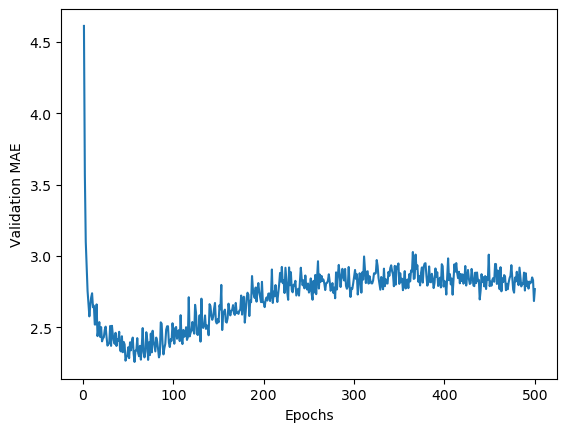

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [37]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

validation MAE stops improving significantly after 80 epochs.

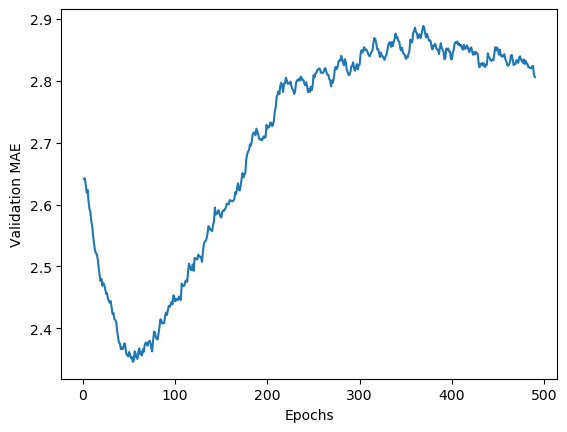

In [38]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

__train final model__

In [39]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 560us/step


In [40]:
test_mae_score #Still off by $2,700

2.6786839962005615